In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load dataset (using only first 2 features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Features: Sepal length and Sepal width
y = iris.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Prediction
y_pred = svm_model.predict(X_test_scaled)



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7333333333333333
Precision (macro): 0.6923076923076922
Recall (macro): 0.6923076923076922
F1-score (macro): 0.6923076923076922
Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



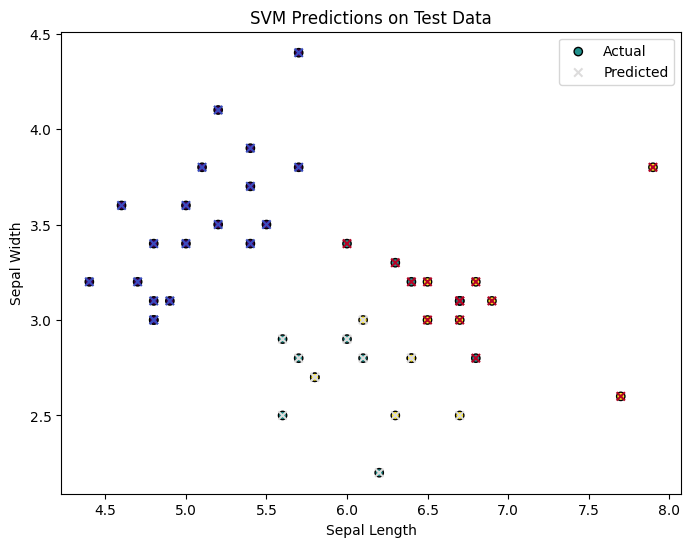

In [20]:
# Simple visualization: Only plot the test data and predicted classes
plt.figure(figsize=(8, 6))

# Plot actual test data colored by true label
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Actual', marker='o', edgecolors='k')

# Plot same test data colored by predicted label (using X_test_scaled for prediction)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, label='Predicted', marker='x', cmap=plt.cm.coolwarm)

plt.title('SVM Predictions on Test Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
